In [ ]:
# !pip install flask matplotlib pyngrok  # Only needed if you're in a fresh environment like Colab

import threading
import time

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io, base64


#librerias oara el modelo predictivo
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import seaborn as sns
import sys
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


#librerias acceder al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargar los datos
df = pd.read_csv("/content/drive/MyDrive/Seminario bigdata/datos/DatosPrecioInterno.csv")


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha            8043 non-null   object
 1   Precio Interno   8043 non-null   object
dtypes: object(2)
memory usage: 125.8+ KB


In [ ]:
#limpiar  and convertir 'Precio Interno ' a valor int
df['Precio Interno '] = pd.to_numeric(df['Precio Interno ']
                                    .str.replace(r'[^0-9,]', '', regex=True)  # Remove *m² and $, except commas
                                    .str.replace(',', '.', regex=False))  # commas with dots

In [ ]:
meses_es = {
    "ene": "Jan",
    "feb": "Feb",
    "mar": "Mar",
    "abr": "Apr",
    "may": "May",
    "jun": "Jun",
    "jul": "Jul",
    "ago": "Aug",
    "sep": "Sep",
    "oct": "Oct",
    "nov": "Nov",
    "dic": "Dec"
}


In [ ]:
# Reemplazar los meses en español por inglés en la columna 'Fecha'
for mes_es, mes_en in meses_es.items():
    df['Fecha'] = df['Fecha'].str.replace(mes_es, mes_en, regex=False)

# Convertir la columna 'Fecha' a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%b-%y', errors='coerce')

# Imprimir el DataFrame para verificar
df

,Fecha,Precio Interno
0,2003-01-02,277000
1,2003-01-03,280875
2,2003-01-04,280875
3,2003-01-05,280875
4,2003-01-06,281500
...,...,...
8038,2025-01-15,2728000
8039,2025-01-16,2725000
8040,2025-01-17,2732000
8041,2025-01-18,2732000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            8043 non-null   datetime64[ns]
 1   Precio Interno   8043 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 125.8 KB


In [ ]:
df.shape

(8043, 2)

In [ ]:
df.corr().abs()

,Fecha,Precio Interno
Fecha,1.000000,0.797401
Precio Interno,0.797401,1.000000


In [ ]:
df.describe()

,Fecha,Precio Interno
count,8043,8.043000e+03
mean,2014-01-06 22:24:02.148452096,8.620708e+05
min,2003-01-02 00:00:00,2.770000e+05
25%,2008-07-04 12:00:00,4.941250e+05
50%,2014-01-05 00:00:00,7.296250e+05
75%,2019-07-10 12:00:00,9.632500e+05
max,2025-01-19 00:00:00,2.865000e+06
std,NaN,5.195525e+05


In [ ]:
df.isnull().sum()

,0
Fecha,0
Precio Interno,0


In [ ]:
# Remove corrupted data.

df = \
df[~df['Fecha'].isnull()]

In [ ]:
# Check to see if any corrupted rows remain.

print('Number of users with corrupted data:',
      df[df['Fecha']. \
                         isnull()].shape[0])

Number of users with corrupted data: 0


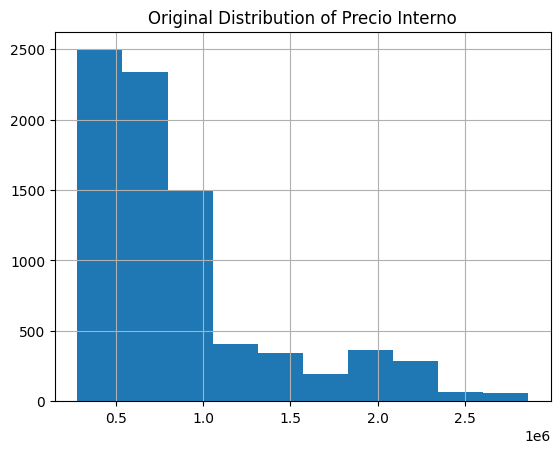

In [ ]:
df['Precio Interno '].hist()
plt.title('Original Distribution of Precio Interno');

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            8043 non-null   datetime64[ns]
 1   Precio Interno   8043 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 125.8 KB


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0020 - val_loss: 0.0111 - learning_rate: 0.0010
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0420e-04 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8820e-04 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5752e-04 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2580e-04 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8648e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8693e-04 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 8/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0048e-04 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 9/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8844e-04 - val_loss: 0.0039 - lea

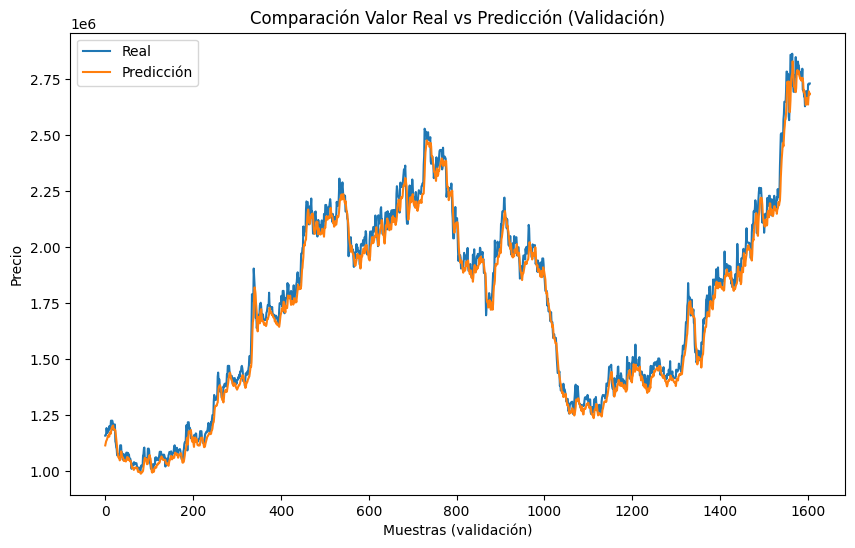

Error MSE en validación: 0.00037577515468001366
RMSE en validación: 50168.16692159442


In [ ]:
# -------------------------------------------------------
#  PreDefinicion  de los hiperparametros
# -------------------------------------------------------

SECUENCIA_DIAS = 18      # Número de días previos para usar como features
EPOCHS = 100
BATCH_SIZE = 16
VAL_SPLIT = 0.2

# -------------------------------------------------------
# 1 Carga y preparación de datos
# -------------------------------------------------------
# 1.1 Asegurar orden temporal
df = df.sort_values('Fecha')
# 1.2. Obtenemos sólo la columna de precios
precios = df['Precio Interno '].values.reshape(-1,1)

# 1.3. Escalamos los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
precios_scaled = scaler.fit_transform(precios)

# 1.4. Preparamos secuencias (X) e etiquetas (y)
X, y = [], []
for i in range(SECUENCIA_DIAS, len(precios_scaled)):
    X.append(precios_scaled[i-SECUENCIA_DIAS:i, 0])
    y.append(precios_scaled[i, 0])

X = np.array(X)
y = np.array(y)

# -------------------------------------------------------
# 2. Construcción del modelo MLP
# -------------------------------------------------------


# 2.1 efinir la cantidad de nodos y neuronas
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(SECUENCIA_DIAS,)))
model.add(Dropout(0.2))  # Ayuda a evitar sobreajuste
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Salida única para regresión


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# 2.2. Callbacks para eficiencia en entrenamiento:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# -------------------------------------------------------
# 3. Entrenamiento del modelo
# -------------------------------------------------------
history = model.fit(X, y,
                    validation_split=VAL_SPLIT,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

# -------------------------------------------------------
# 4. Evaluación y visualización
# -------------------------------------------------------
# Predicción sobre el conjunto de validación
val_size = int(len(X)*VAL_SPLIT)
X_val = X[-val_size:]
y_val = y[-val_size:]

predictions = model.predict(X_val)
# Invertimos la escala para tener valores originales
predictions_orig = scaler.inverse_transform(predictions)
y_val_orig = scaler.inverse_transform(y_val.reshape(-1,1))

# Graficamos las predicciones vs. valores reales
plt.figure(figsize=(10,6))
plt.plot(y_val_orig, label='Real')
plt.plot(predictions_orig, label='Predicción')
plt.title('Comparación Valor Real vs Predicción (Validación)')
plt.xlabel('Muestras (validación)')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Cálculo de MSE y RMSE en validación
loss = model.evaluate(X_val, y_val, verbose=0)
rmse_val = np.sqrt(mean_squared_error(y_val_orig, predictions_orig))

print(f"Error MSE en validación: {loss}")
print(f"RMSE en validación: {rmse_val}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

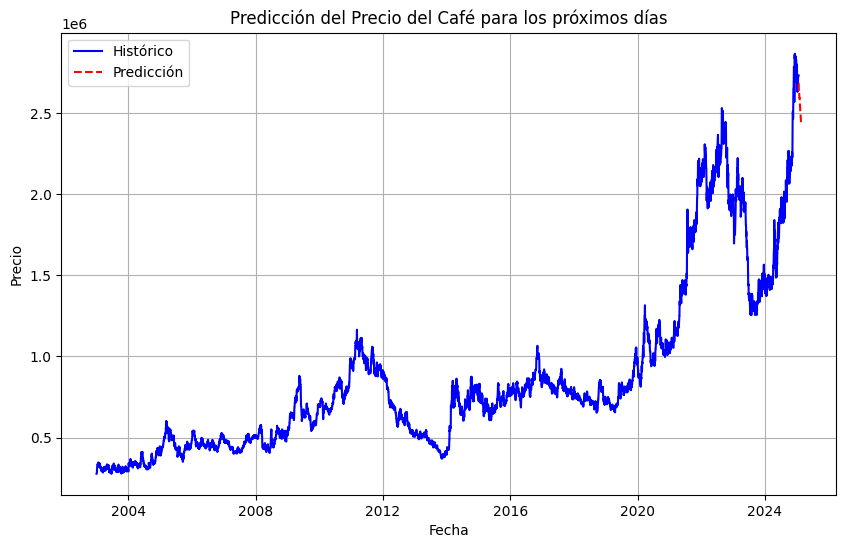

In [ ]:
# Usuario define la cantidad de días a predecir
dias_a_predecir = 30

# Asegurarse de que la columna 'Fecha' esté en formato datetime y manejar valores NaT
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')  # Convertir a datetime, manejar errores
df.dropna(subset=['Fecha'], inplace=True)  # Eliminar filas con valores NaT en 'Fecha'

# Datos de precios escalados (debes haber hecho el escalado previamente)
# Precios escalados (suponiendo que 'precios_scaled' es la variable de precios escalados)
# y 'SECUENCIA_DIAS' es el número de días de secuencia usado para la predicción
ultimos_dias = precios_scaled[-SECUENCIA_DIAS:]

# Inicializar listas para guardar las predicciones y fechas
predicciones_futuras = []
fechas_predicciones = []

# Obtener la última fecha del DataFrame
ultima_fecha = df['Fecha'].iloc[-1]

for i in range(dias_a_predecir):
    # Reshape ultimos_dias para la forma (1, SECUENCIA_DIAS) para la predicción
    proxima_prediccion = model.predict(ultimos_dias.reshape(1, -1))
    predicciones_futuras.append(proxima_prediccion[0, 0])
    ultimos_dias = np.append(ultimos_dias[1:], proxima_prediccion)  # Actualizar 'ultimos_dias' para la siguiente predicción

    # Calcular la fecha para la predicción actual
    fecha_prediccion = ultima_fecha + timedelta(days=i+1)
    fechas_predicciones.append(fecha_prediccion)

# Desescalar las predicciones de vuelta a los valores originales
predicciones_futuras_orig = scaler.inverse_transform(np.array(predicciones_futuras).reshape(-1, 1))

# Crear un DataFrame para las predicciones con fechas
predicciones_df = pd.DataFrame({'Fecha': fechas_predicciones, 'Precio': predicciones_futuras_orig.flatten()})

# Imprimir o visualizar predicciones futuras
print(f"Predicciones para los próximos {dias_a_predecir} días:")
print(predicciones_df)

# Visualizar las predicciones futuras
# Ahora 'df['Fecha']' debería ser un objeto datetime válido
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Precio Interno '], label='Histórico', color='blue')
plt.plot(predicciones_df['Fecha'], predicciones_df['Precio'], label='Predicción', color='red', linestyle='--')
plt.title('Predicción del Precio del Café para los próximos días')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install flask fastapi uvicorn pyngrok matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install fastapi uvicorn pyngrok matplotlib pandas

In [ ]:
matplotlib.use('Agg') #(no GUI) rendering
from flask import Flask, render_template_string
from pyngrok import ngrok

In [ ]:
NGROK_AUTH_TOKEN = "2rlWS2LHpXBqZdilYamC2faKsnE_2ZyggyX2XtphXXUQn9WgC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import io
import base64


# 1. Set your ngrok auth token

# 2. Crear una simple app flask
flask_app = Flask(__name__)


@flask_app.route("/")
def dashboard():
  #Creamos un codigo que nos permita hallar los promedios de incremento por año del precio del cafe
  df_2018_onwards = df[df['Fecha'].dt.year >= 2018]
  df_2018_onwards['Price Change (%)'] = df_2018_onwards['Precio Interno '].pct_change() * 100
  average_price_increase = df_2018_onwards.groupby(df_2018_onwards['Fecha'].dt.year)['Price Change (%)'].mean()


  df_predictions = pd.DataFrame(predicciones_df)
  # Crear gráficos con Matplotlib
  # Gráfico 1: historico del precio del cafe (Gráfico simple de línea)
  fig1, ax1 = plt.subplots(figsize=(10, 6))
  ax1.plot(df['Fecha'], df['Precio Interno '], marker='o', color='#6e33ff')
  ax1.set_title('Gráfico historico del precio interno del cafe', )
  ax1.set_xlabel('Fechas')
  ax1.set_ylabel('Precios' )
  ax1.grid(True)
  # Gráfico 2: Columna 1 vs Columna 3 (Gráfico de barras)
  fig2, ax2 = plt.subplots(figsize=(10, 6))
  ax2.plot(df_predictions['Fecha'], df_predictions['Precio'], marker='o', color='#6e33ff')
  ax2.set_title('Grafico Predicciones del cafe' )
  ax2.set_xlabel('Fechas')
  ax2.set_ylabel('Precios')
  ax2.grid(True)
  #grafico 3 Promedio anual
  fig3, ax3 = plt.subplots(figsize=(10, 6))
  ax3.bar(average_price_increase.index, average_price_increase.values, color='#6e33ff')
  ax3.set_xlabel('Año')
  ax3.set_ylabel('Cambio de precio promedio (%)')
  ax3.set_title('Cambio promedio anual de precios del café (2018 en adelante)' )
  ax3.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(average_price_increase.index, rotation=45)



  # Convertir las gráficas a base64
  plot_1_base64 = plot_to_base64(fig1)
  plot_2_base64 = plot_to_base64(fig2)
  plot_3_base64 = plot_to_base64(fig3)
  # Convertir DataFrame original a HTML y usar clases de Bootstrap para la tabla
  html_table = df.to_html(classes='table table-bordered table-striped table-hover', index=False, table_id="data-table")
  # Convertir DataFrame de predicciones a HTML
  html_predictions = df_predictions.to_html(classes='table table-bordered table-striped table-hover', index=False, table_id="predictions-table")


  # Generar HTML para mostrar las gráficas y las tablas
  html_page = """
  <!DOCTYPE html>
  <html lang="es">
  <head>
      <meta charset="UTF-8">
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <title>Dashboard con Bootstrap</title>
      <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet">
      <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.12.1/css/jquery.dataTables.min.css">
      <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
      <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.12.1/js/jquery.dataTables.min.js"></script>
      <script type="text/javascript">
          $(document).ready( function () {
              $('#data-table').DataTable({
                  "pageLength": 5,
                  "lengthMenu": [5, 10, 15, 20],
                  "searching": true,
                  "ordering": true,
                  "info": true,
              });
              $('#predictions-table').DataTable({
                  "pageLength": 5,
                  "lengthMenu": [5, 10, 15, 20],
                  "searching": true,
                  "ordering": true,
                  "info": true,
              });
          });
      </script>
      <style>
          body {
              font-family: Arial, sans-serif;
              background-color: #f4f4f4;
          }
          .container {
              margin-top: 30px;
          }
          .plot img {
              max-width: 100%;
              max-height: 500px;
              border: 1px solid #ccc;
              margin-bottom: 10px;
          }
          .table-container {
              margin-top: 20px;
          }
          /* Fondo de imagen en la cabecera */
          .header-background {
            background-image: url('https://th.bing.com/th/id/R.d3a6927c0a0af9faaf51ecda6f8bfae0?rik=ZW%2bxhEcM089onw&riu=http%3a%2f%2ftodocafe.es%2fwp-content%2fuploads%2f2020%2f10%2fcafe_expreso.jpg&ehk=j5VzZcHJE8sIvUMPVOE56DCBsqMIvZJkgDy%2f3W9XCDY%3d&risl=&pid=ImgRaw&r=0'); /* Cambia esta URL por la de tu imagen */
            background-size: cover;
            background-position: center;
            padding: 50px 0;
            color: black;
            text-align: center;
        }
      </style>
  </head>
  <body>
      <div class="container">
        <!-- Cabecera con fondo y título dentro de un cuadro -->
        <div class="header-background">
            <div class="header-title">
                <h1 class="text-center mb-5">Dashboard con Gráficas y Datos del precio interno del café</h1>
            </div>
        </div>
  """

  # Agregar las gráficas dinámicamente usando las clases de Bootstrap
  html_page += f"""
      <div class="row plot mb-4">
          <div class="col-md-6">
              <h2 class="text-center">Gráfico historico del precio interno del café</h2>
              <img src="{plot_1_base64}" alt="Gráfico 1" class="img-fluid" />
               <p class="description text-center">
                  Este gráfico presenta las variaciones en el precio interno del café desde el 2003 hasta 2024.
               </p>
          </div>
          <div class="col-md-6">
              <h2 class="text-center">Grafico de los resultados predecidos del precio interno del café</h2>
              <img src="{plot_2_base64}" alt="Gráfico 2" class="img-fluid" />
               <p class="description text-center">
                  Este grafico presenta los valores predecidos del café en un lapso de 30 dias.
               </p>
          </div>
      </div>
      <hr/>
  """
  html_page += f"""
      <div class="row plot mb-4">
          <div class="col-md-6 offset-md-3">
              <h2 class="text-center">Cambio promedio anual de precios del café</h2>
              <img src="{plot_3_base64}" alt="Cambio promedio anual de precios del café" class="img-fluid" />
              <p class="description text-center">
                  Este gráfico muestra el cambio promedio anual de precios del café desde 2018 hasta el 2024.
              </p>
          </div>
      </div>
      <hr/>
  """
  # Agregar la tabla de datos
  html_page += f"""
      <div class="table-container">
          <h2>Datos historicos del precio interno del cafe</h2>
          {html_table}
           <p class="description text-center">Esta tabla contiene todos los valores diarios registrados oficialmente por la federacion nacional de cafeteros del precio interno del café desde el 2003 hasta el 2024.</p>
      </div>
      <hr/>
  """


  # Agregar la tabla de predicciones
  html_page += f"""
      <div class="table-container">
          <h2>Predicciones</h2>
          {html_predictions}
           <p class="description text-center">Esta tabla contiene los valores predecidos junto con las fechas predecidas del precio interno del café en un intervalo de 30 dias.</p>
      </div>
  </div>
  </body>
  </html>
  """

  return render_template_string(html_page)

# Función para graficar y convertir la figura a base64
def plot_to_base64(fig):
    img_bytes = io.BytesIO()
    fig.savefig(img_bytes, format='png', bbox_inches='tight')
    img_bytes.seek(0)
    img_base64 = base64.b64encode(img_bytes.read()).decode('utf-8')
    return f"data:image/png;base64,{img_base64}"



def run_flask():
    # Run Flask on localhost (port 5000)
    flask_app.run(host="0.0.0.0", port=5000)

# 3. Launch Flask in a background thread
threading.Thread(target=run_flask).start()

# Short sleep to let Flask start up
time.sleep(1)

# 4. Create an ngrok tunnel on port 5000, enabling HTTPS
public_url = ngrok.connect(5000, bind_tls=True)
print("PUBLIC URL:", public_url.public_url)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


PUBLIC URL: https://6058-34-85-186-234.ngrok-free.app
